**Name:** Muluwork Geremew 

**Course:** Advanced Big Data and Data Mining  
**Lab Assignment:** Data Analysis Lab 1


#### Step 1: Data Collection

1. Load the `walmart_sales.csv` dataset into a Pandas DataFrame.  
2. Display the first five rows of the DataFrame using `.head()` to verify that it loaded correctly.  (Screenshot Required)



In [2]:
import pandas as pd

# Load your uploaded CSV
df = pd.read_csv('walmart_sales.csv')

# Display first 5 rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Step 2: Data Visualization

1. Convert the “Date” column to a datetime type so that you can plot against time.  
2. Create at least two visualizations (choose from the list below) to explore the Walmart sales data:  
   - **Line Plot:** Show how `Weekly_Sales` changes over time (use the converted `Date` column).  
   - **Bar Chart:** Compare total `Weekly_Sales` by `Store` or by `Holiday_Flag` status.  
   - **Histogram:** Display the distribution of `Weekly_Sales` values.  
   - **Scatter Plot:** Show the relationship between `Temperature` and `Weekly_Sales` (or `Fuel_Price` vs. `Weekly_Sales`).  
   - **Box Plot:** Visualize the spread and outliers of `Weekly_Sales` across different `Holiday_Flag` categories.  
   - **Pie Chart:** Represent the proportion of weeks marked as a holiday vs. non‐holiday (using `Holiday_Flag`).  

3. For each plot, include a short description (1–2 sentences) of any insights you observe.  
4. (Screenshot Required) Capture each chart’s output in your notebook and place your “Insight” text directly below the plot.




------------------Line Plot: Total Weekly Sales Over Time 


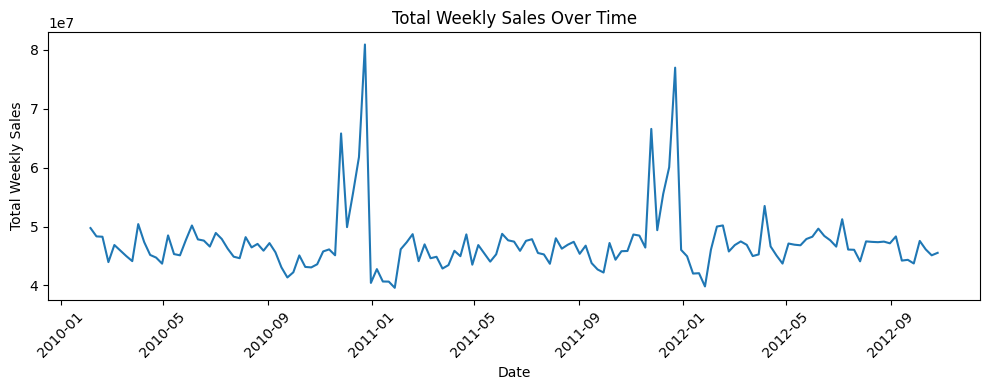



------------------Histogram: Distribution of Weekly Sales 


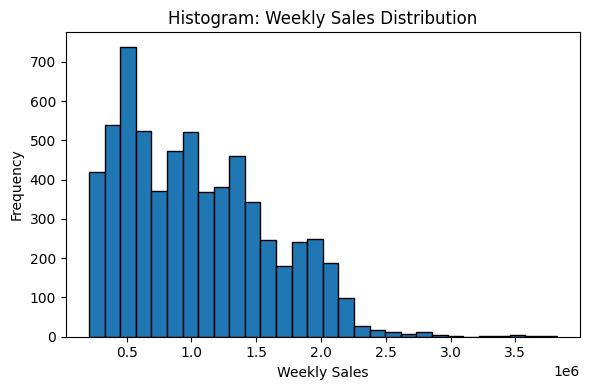



------------------Scatter Plot: Temperature vs. Weekly Sales 


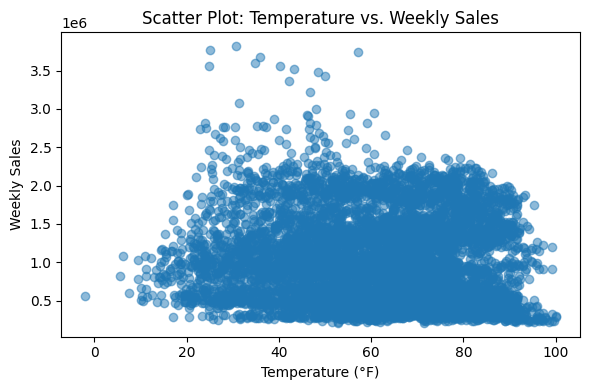



------------------Box Plot: Weekly Sales by Holiday Flag 


<Figure size 600x400 with 0 Axes>

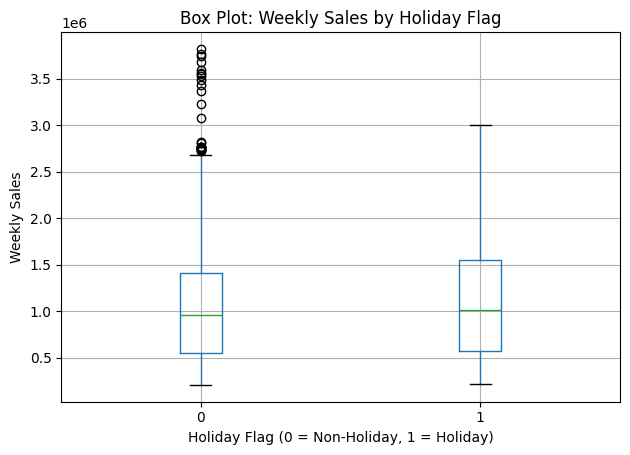



------------------Bar Chart: Total Weekly Sales by Store 


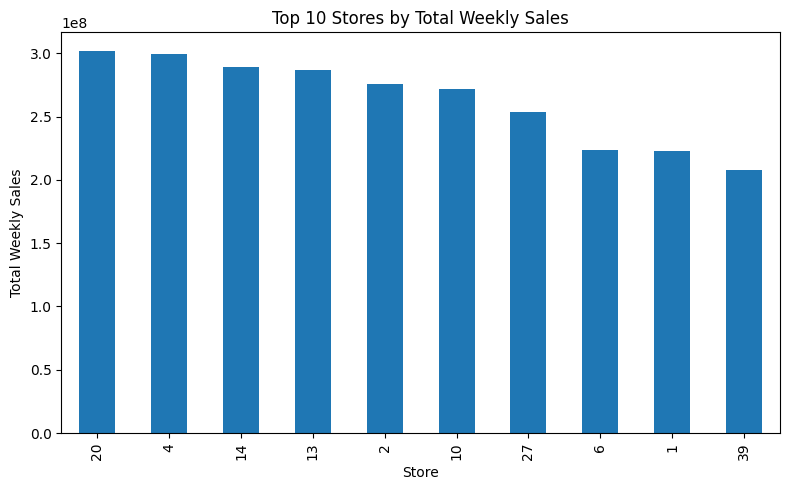



------------------Pie Chart: Proportion of Holiday vs. Non-Holiday Weeks 


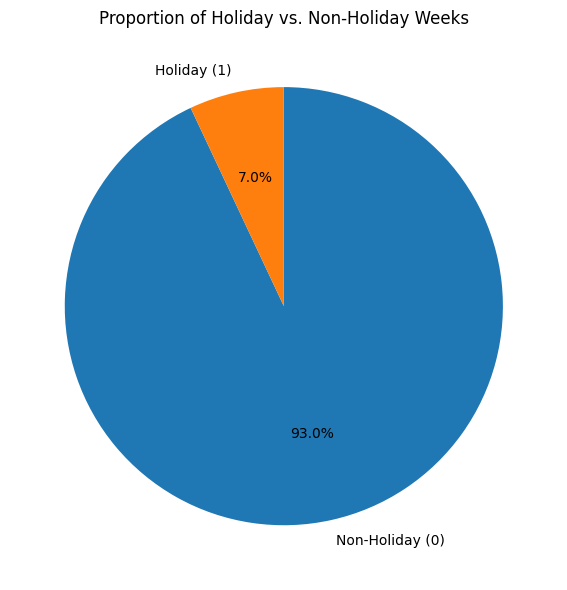

In [8]:
import matplotlib.pyplot as plt
# Plotting the sales data
# plt.figure(figsize=(12, 6))
# # Check for missing values and data types
# print(df.info())
# # Check for missing values
# print(df.isnull().sum())
# # Check for unique values in categorical columns
# print(df['Holiday_Flag'].unique())
# # Check the data types of the columns
# print(df.dtypes)
# # Convert "Date" column to string format for consistency
# df['Date'] = df['Date'].astype(str)
# # Convert "Weekly_Sales" to numeric, handling errors by coercing invalid parsing to NaN
# df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')
# # Import necessary libraries

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# 1. Line Plot: Total Weekly Sales Over Time
print("\n\n------------------Line Plot: Total Weekly Sales Over Time ")
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().sort_index()
plt.figure(figsize=(10, 4))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Insight: We can observe the overall trend in sales across all stores—peaks may correspond to holiday seasons or promotional periods.

# 2. Histogram: Distribution of Weekly Sales
print("\n\n------------------Histogram: Distribution of Weekly Sales ")
plt.figure(figsize=(6, 4))
plt.hist(df['Weekly_Sales'], bins=30, edgecolor='black')
plt.title('Histogram: Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
# Insight: The majority of weekly sales fall within a certain mid-range, with fewer weeks showing very high sales—indicating occasional spikes.

# 3. Scatter Plot: Temperature vs. Weekly Sales
print("\n\n------------------Scatter Plot: Temperature vs. Weekly Sales ")
plt.figure(figsize=(6, 4))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
plt.title('Scatter Plot: Temperature vs. Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()
# Insight: We can check if there’s any visible relationship between weather (temperature) and sales; clusters may indicate no strong correlation.

# 4. Box Plot: Weekly Sales by Holiday Flag
print("\n\n------------------Box Plot: Weekly Sales by Holiday Flag ")
plt.figure(figsize=(6, 4))
df.boxplot(column='Weekly_Sales', by='Holiday_Flag')
plt.title('Box Plot: Weekly Sales by Holiday Flag')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()
# Insight: Comparing sales distributions on holiday vs. non-holiday weeks can reveal whether holidays consistently drive higher sales.


# 5. Bar Chart: Total Weekly Sales by Store
print("\n\n------------------Bar Chart: Total Weekly Sales by Store ")
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
# Optionally, plot only the top 10 stores to keep the chart readable:
top10_sales = sales_by_store.head(10)

plt.figure(figsize=(8, 5))
top10_sales.plot(kind='bar')
plt.title('Top 10 Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()
# Insight: These top 10 stores generate the highest cumulative weekly sales—useful for identifying best-performing locations.

# 6. Pie Chart: Proportion of Holiday vs. Non-Holiday Weeks
print("\n\n------------------Pie Chart: Proportion of Holiday vs. Non-Holiday Weeks ")
holiday_counts = df['Holiday_Flag'].value_counts().sort_index()
labels = ['Non-Holiday (0)', 'Holiday (1)']

plt.figure(figsize=(6, 6))
plt.pie(holiday_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proportion of Holiday vs. Non-Holiday Weeks')
plt.tight_layout()
plt.show()


## Step 3: Data Preprocessing

1. **Handling Missing Values**  
   - Detect and report missing values for each column (use `df.isnull().sum()`).  
   - Choose one or more strategies to fill or drop missing entries.  
     - For example, fill missing numeric values (e.g., `Temperature`, `Fuel_Price`) with the column median.  
     - If a categorical column has missing entries, you might drop those rows or fill with a placeholder.  
   - (Screenshot Required: Display missing‐value counts before and after handling.)

2. **Outlier Detection and Removal**  
   - Use the IQR method to identify outliers in the `Weekly_Sales` column:  
     1. Compute Q1 (25th percentile) and Q3 (75th percentile).  
     2. Compute IQR = Q3 − Q1, then set  
        - lower_bound = Q1 − 1.5 × IQR  
        - upper_bound = Q3 + 1.5 × IQR  
     3. List any rows outside [lower_bound, upper_bound].  
   - Remove those outlier rows from the DataFrame.  
   - (Screenshot Required: Show Q1, Q3, IQR, lower/upper bounds, number of outliers, and DataFrame shape before/after removal.)

3. **Data Reduction**  
   - **Sampling:** Take a 50% random sample of the data (or whichever fraction you prefer).  
   - **Column Elimination:** Drop columns that you do not need for further analysis. For instance, if you won’t use `CPI` or `Unemployment`, drop them:  
     ```python
     df_sampled.drop(columns=['CPI', 'Unemployment'], inplace=True)
     ```  
   - (Screenshot Required: Show DataFrame shape before and after sampling/reduction.)

4. **Data Scaling & Discretization**  
   - **Scaling (Min–Max):** Scale the `Weekly_Sales` column to a 0–1 range using `sklearn.preprocessing.MinMaxScaler`.  
   - **Discretization:** Create a new column that bins one of the numeric features into categories. For example, bin `Temperature` into “Low,” “Medium,” “High” (choose your own bin edges).  
   - (Screenshot Required: Show the first few rows of the new scaled column and the discretized column side by side.)



In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# (1) Load the dataset (if not already loaded in this session)
df = pd.read_csv('walmart_sales.csv')

# Convert "Date" to datetime again if needed
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# --- 1. Handling Missing Values ---

# 1a. Show missing‐value counts before handling
print("Missing values (before):")
print(df.isnull().sum())

# 1b. Example strategy:
#     - Fill missing Temperature & Fuel_Price with their median.
#     - If any other numeric column has missing, fill with median as well.
#     - If any categorical column is missing, drop those rows entirely.

# Compute medians
temp_median = df['Temperature'].median()
fuel_median = df['Fuel_Price'].median()

# Fill missing numeric columns with medians
df['Temperature_filled'] = df['Temperature'].fillna(temp_median)
df['Fuel_Price_filled'] = df['Fuel_Price'].fillna(fuel_median)

# If there were any missing entries in, say, "CPI" or "Unemployment", fill with median
for col in ['CPI', 'Unemployment']:
    if df[col].isnull().any():
        df[col + '_filled'] = df[col].fillna(df[col].median())
    else:
        df[col + '_filled'] = df[col]

# Drop rows where a critical categorical field is missing (e.g., if “Store” or “Holiday_Flag” were missing)
df_no_missing = df.dropna(subset=['Store', 'Holiday_Flag'])

# 1c. Show missing‐value counts after handling
print("\nMissing values (after):")
print(df_no_missing[['Temperature_filled', 'Fuel_Price_filled', 'CPI_filled', 'Unemployment_filled']].isnull().sum())

# --- 2. Outlier Detection & Removal for Weekly_Sales ---

# 2a. Compute Q1, Q3, IQR
Q1 = df_no_missing['Weekly_Sales'].quantile(0.25)
Q3 = df_no_missing['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nWeekly_Sales Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# 2b. Identify outliers
outliers = df_no_missing[(df_no_missing['Weekly_Sales'] < lower_bound) |
                         (df_no_missing['Weekly_Sales'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# 2c. Remove outliers
df_no_outliers = df_no_missing[~((df_no_missing['Weekly_Sales'] < lower_bound) |
                                 (df_no_missing['Weekly_Sales'] > upper_bound))]

print(f"Shape before outlier removal: {df_no_missing.shape}")
print(f"Shape after outlier removal:  {df_no_outliers.shape}")

# --- 3. Data Reduction ---

# 3a. Sampling 50% of the data
df_sampled = df_no_outliers.sample(frac=0.5, random_state=42)
print(f"\nShape before sampling: {df_no_outliers.shape}")
print(f"Shape after sampling (50%): {df_sampled.shape}")

# 3b. Drop less relevant columns (example: drop CPI_filled and Unemployment_filled
#    if you decide not to use them in downstream analysis)
cols_to_drop = ['CPI_filled', 'Unemployment_filled']
df_reduced = df_sampled.drop(columns=cols_to_drop, errors='ignore')
print(f"Shape after dropping columns {cols_to_drop}: {df_reduced.shape}")

# --- 4. Data Scaling & Discretization ---

# 4a. Min–Max scaling for 'Weekly_Sales'
scaler = MinMaxScaler()
df_reduced['Weekly_Sales_Scaled'] = scaler.fit_transform(df_reduced[['Weekly_Sales']])

# 4b. Discretize 'Temperature_filled' into bins
# Define custom bins for temperature. Adjust edges as appropriate for your region.
temp_bins = [df_reduced['Temperature_filled'].min() - 1, 30, 50, 70, df_reduced['Temperature_filled'].max() + 1]
temp_labels = ['Very Low (<30°F)', 'Low–Medium (30–50°F)', 'Medium–High (50–70°F)', 'High (>70°F)']
df_reduced['Temp_Category'] = pd.cut(df_reduced['Temperature_filled'], bins=temp_bins, labels=temp_labels)

# 4c. Display the first few rows to compare original vs. scaled/discretized columns
df_reduced[['Weekly_Sales', 'Weekly_Sales_Scaled', 
            'Temperature_filled', 'Temp_Category']].head()


Missing values (before):
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Missing values (after):
Temperature_filled     0
Fuel_Price_filled      0
CPI_filled             0
Unemployment_filled    0
dtype: int64

Weekly_Sales Q1: 553350.10, Q3: 1420158.66, IQR: 866808.55
Lower bound: -746862.73, Upper bound: 2720371.49
Number of outliers detected: 34
Shape before outlier removal: (6435, 12)
Shape after outlier removal:  (6401, 12)

Shape before sampling: (6401, 12)
Shape after sampling (50%): (3200, 12)
Shape after dropping columns ['CPI_filled', 'Unemployment_filled']: (3200, 10)


,Weekly_Sales,Weekly_Sales_Scaled,Temperature_filled,Temp_Category
1388,1711562.73,0.608364,51.00,Medium–High (50–70°F)
4484,1006814.85,0.322835,34.86,Low–Medium (30–50°F)
5030,432451.91,0.090132,81.88,High (>70°F)
1043,1261693.16,0.426099,51.07,Medium–High (50–70°F)
132,1597868.05,0.562301,84.85,High (>70°F)


## Step 4: Statistical Analysis

1. **General Overview of Data**  
   - Use `df_reduced.info()` to inspect the DataFrame structure (column names, non-null counts, data types).  
   - Use `df_reduced.describe()` to get summary statistics for numeric columns.  
   - (Screenshot Required: Display both `.info()` and `.describe()` outputs.)

2. **Central Tendency Measures (for the `Weekly_Sales` column)**  
   - Calculate and print:  
     - Minimum (`min`)  
     - Maximum (`max`)  
     - Mean (`mean`)  
     - Median (`median`)  
     - Mode (`mode`)  
   - (Screenshot Required: Display your printed results.)

3. **Dispersion Measures (for the `Weekly_Sales` column)**  
   - Compute and print:  
     - Range (max − min)  
     - Quartiles Q1 (25th percentile) and Q3 (75th percentile)  
     - Interquartile Range (IQR = Q3 − Q1)  
     - Variance (`var`)  
     - Standard Deviation (`std`)  
   - (Screenshot Required: Display your printed results.)

4. **Correlation Analysis**  
   - Select a subset of numeric columns (e.g., `Weekly_Sales`, `Temperature_filled`, `Fuel_Price_filled`, `Unemployment_filled`) and compute the correlation matrix via `df_reduced[[...]].corr()`.  
   - (Screenshot Required: Display the correlation matrix output.)


In [12]:
# -----------------------------
# Step 4: Statistical Analysis
# -----------------------------

# (Assuming `df_reduced` already exists from Step 3 preprocessing)

# 4.1 General Overview of Data
print("---- df_reduced.info() ----")
df_reduced.info()

print("\n---- df_reduced.describe() ----")
display(df_reduced.describe())

# 4.2 Central Tendency Measures for 'Weekly_Sales'
ws_min    = df_reduced['Weekly_Sales'].min()
ws_max    = df_reduced['Weekly_Sales'].max()
ws_mean   = df_reduced['Weekly_Sales'].mean()
ws_median = df_reduced['Weekly_Sales'].median()
ws_mode   = df_reduced['Weekly_Sales'].mode()[0]

print("\n---- Weekly_Sales: Central Tendency ----")
print(f"Min    : {ws_min:.2f}")
print(f"Max    : {ws_max:.2f}")
print(f"Mean   : {ws_mean:.2f}")
print(f"Median : {ws_median:.2f}")
print(f"Mode   : {ws_mode:.2f}")

# 4.3 Dispersion Measures for 'Weekly_Sales'
ws_range    = ws_max - ws_min
ws_Q1       = df_reduced['Weekly_Sales'].quantile(0.25)
ws_Q3       = df_reduced['Weekly_Sales'].quantile(0.75)
ws_IQR      = ws_Q3 - ws_Q1
ws_variance = df_reduced['Weekly_Sales'].var()
ws_std      = df_reduced['Weekly_Sales'].std()

print("\n---- Weekly_Sales: Dispersion ----")
print(f"Range       : {ws_range:.2f}")
print(f"Q1 (25th %) : {ws_Q1:.2f}")
print(f"Q3 (75th %) : {ws_Q3:.2f}")
print(f"IQR (Q3−Q1) : {ws_IQR:.2f}")
print(f"Variance    : {ws_variance:.2f}")
print(f"Std Dev     : {ws_std:.2f}")

# 4.4 Correlation Analysis
# Choose numeric columns that still exist in df_reduced.
# Since 'Unemployment_filled' was dropped earlier, use the original 'Unemployment' column.
numeric_cols = ['Weekly_Sales', 'Temperature_filled', 'Fuel_Price_filled', 'Unemployment']

corr_matrix = df_reduced[numeric_cols].corr()

print("\n---- Correlation Matrix ----")
display(corr_matrix)


---- df_reduced.info() ----
<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1388 to 2857
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                3200 non-null   int64         
 1   Date                 3200 non-null   datetime64[ns]
 2   Weekly_Sales         3200 non-null   float64       
 3   Holiday_Flag         3200 non-null   int64         
 4   Temperature          3200 non-null   float64       
 5   Fuel_Price           3200 non-null   float64       
 6   CPI                  3200 non-null   float64       
 7   Unemployment         3200 non-null   float64       
 8   Temperature_filled   3200 non-null   float64       
 9   Fuel_Price_filled    3200 non-null   float64       
 10  Weekly_Sales_Scaled  3200 non-null   float64       
 11  Temp_Category        3200 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(8), int64(2)
memory u

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temperature_filled,Fuel_Price_filled,Weekly_Sales_Scaled
count,3200.000000,3200,3.200000e+03,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,22.890625,2011-06-19 15:59:51,1.044816e+06,0.068125,60.884184,3.358178,172.568754,7.975949,60.884184,3.358178,0.338231
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,6.230000,2.513000,126.064000,3.879000,6.230000,2.513000,0.000000
25%,11.000000,2010-10-15 00:00:00,5.553879e+05,0.000000,47.547500,2.924000,132.022667,6.891000,47.547500,2.924000,0.139940
50%,23.000000,2011-06-17 00:00:00,9.724779e+05,0.000000,63.245000,3.433000,184.809719,7.866000,63.245000,3.433000,0.308924
75%,34.000000,2012-02-24 00:00:00,1.428969e+06,0.000000,74.977500,3.735000,213.555540,8.557250,74.977500,3.735000,0.493871
max,45.000000,2012-10-26 00:00:00,2.678206e+06,1.000000,99.660000,4.468000,226.987364,14.313000,99.660000,4.468000,1.000000
std,13.032118,NaN,5.456529e+05,0.252000,18.345400,0.462784,39.551099,1.856087,18.345400,0.462784,0.221071



---- Weekly_Sales: Central Tendency ----
Min    : 209986.25
Max    : 2678206.42
Mean   : 1044815.63
Median : 972477.95
Mode   : 209986.25

---- Weekly_Sales: Dispersion ----
Range       : 2468220.17
Q1 (25th %) : 555387.94
Q3 (75th %) : 1428968.87
IQR (Q3−Q1) : 873580.94
Variance    : 297737067318.72
Std Dev     : 545652.88

---- Correlation Matrix ----


,Weekly_Sales,Temperature_filled,Fuel_Price_filled,Unemployment
Weekly_Sales,1.000000,-0.038362,0.033294,-0.096492
Temperature_filled,-0.038362,1.000000,0.140350,0.095251
Fuel_Price_filled,0.033294,0.140350,1.000000,-0.027137
Unemployment,-0.096492,0.095251,-0.027137,1.000000
